In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
option_df=pd.read_csv("/kaggle/input/nseindia-futures-options-daily/fobhav.csv", nrows=1000000)
option_df.reset_index()
option_df.head()

,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,TIMESTAMP,Unnamed: 15
0,FUTIDX,BANKNIFTY,24-Sep-2020,0.0,XX,24900.05,25270.00,23371.00,23743.00,23743.00,504222,3051593.27,1432850,-54500,31-AUG-2020,NaN
1,FUTIDX,BANKNIFTY,29-Oct-2020,0.0,XX,24937.55,25315.90,23391.90,23770.10,23770.10,10630,64526.57,91375,19325,31-AUG-2020,NaN
2,FUTIDX,BANKNIFTY,26-Nov-2020,0.0,XX,24989.95,25280.75,23437.15,23766.20,23766.20,1171,7088.68,14400,8400,31-AUG-2020,NaN
3,FUTIDX,NIFTY,24-Sep-2020,0.0,XX,11764.90,11794.45,11350.50,11401.95,11401.95,314090,2722114.47,11209650,-1007775,31-AUG-2020,NaN
4,FUTIDX,NIFTY,29-Oct-2020,0.0,XX,11765.60,11804.30,11368.00,11430.50,11430.50,8666,75149.14,536250,47925,31-AUG-2020,NaN


In [3]:
option_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   INSTRUMENT   1000000 non-null  object 
 1   SYMBOL       1000000 non-null  object 
 2   EXPIRY_DT    1000000 non-null  object 
 3   STRIKE_PR    1000000 non-null  float64
 4   OPTION_TYP   1000000 non-null  object 
 5   OPEN         1000000 non-null  float64
 6   HIGH         1000000 non-null  float64
 7   LOW          1000000 non-null  float64
 8   CLOSE        1000000 non-null  float64
 9   SETTLE_PR    1000000 non-null  float64
 10  CONTRACTS    1000000 non-null  int64  
 11  VAL_INLAKH   1000000 non-null  float64
 12  OPEN_INT     1000000 non-null  int64  
 13  CHG_IN_OI    1000000 non-null  int64  
 14  TIMESTAMP    1000000 non-null  object 
 15  Unnamed: 15  0 non-null        float64
dtypes: float64(8), int64(3), object(5)
memory usage: 122.1+ MB


In [4]:
avg=1
std_dev=.1
num_reps=1000000
num_simulations=500

In [5]:
pct_to_target=np.random.normal(avg,std_dev,num_reps).round(2)

In [6]:
pct_to_target

array([1.09, 0.89, 0.87, ..., 0.87, 0.81, 0.97])

In [7]:
buy_target_open=[15000,15500,16000,16500,17000,17500,18000,18500,19000,19500,20000,20500,21000,21500,22000,22500,23000,23500,24000,24500,25000]
buy_target_prob=[0.01 ,0.03 ,0.09 ,0.03 ,0.03 ,0.01 ,0.05 ,0.09 ,0.02 ,0.04 ,0.09 ,0.06 ,0.07 ,0.05 ,0.08 ,0.09 ,0.02 ,0.04 ,0.04 ,0.04 ,0.02]
buy_target = np.random.choice(buy_target_open,num_reps, p=buy_target_prob)

In [8]:
df=pd.DataFrame(index=range(num_reps),data={'Pct_to_Target':pct_to_target,'Buy_Target':buy_target})
df['Buy']=df['Pct_to_Target']*df['Buy_Target']

In [9]:
df

,Pct_to_Target,Buy_Target,Buy
0,1.09,22000,23980.0
1,0.89,15500,13795.0
2,0.87,15000,13050.0
3,1.09,20000,21800.0
4,0.92,24500,22540.0
...,...,...,...
999995,1.00,18000,18000.0
999996,0.87,21000,18270.0
999997,0.87,16000,13920.0
999998,0.81,22000,17820.0


In [10]:
def calc_buy(x):
    if(x<0.9):
        return 0.2
    if(x<=0.99):
        return 0.35
    else:
        return 0.45

In [11]:
df['Should Buy']=df['Pct_to_Target'].apply(calc_buy)
df['Profit']=df['Should Buy']*df['Buy']

In [12]:
df.head()

,Pct_to_Target,Buy_Target,Buy,Should Buy,Profit
0,1.09,22000,23980.0,0.45,10791.0
1,0.89,15500,13795.0,0.20,2759.0
2,0.87,15000,13050.0,0.20,2610.0
3,1.09,20000,21800.0,0.45,9810.0
4,0.92,24500,22540.0,0.35,7889.0


In [13]:
all_buy=[]
for i in range(num_simulations):
    buy_target=np.random.choice(buy_target_open,num_reps,p=buy_target_prob)
    pct_to_target=np.random.normal(avg,std_dev,num_reps).round(2)
    df=pd.DataFrame(index=range(num_reps),data={'Pct_to_Target':pct_to_target,'Buy_Target':buy_target})
    df['Buy']=df['Pct_to_Target']*df['Buy_Target']
    df['Should Buy']=df['Pct_to_Target'].apply(calc_buy)
    df['Profit']=df['Should Buy']*df['Buy']
    all_buy.append([df['Buy'].sum().round(0),
                      df['Profit'].sum().round(0),
                      df['Buy_Target'].sum().round(0)])
results_df=pd.DataFrame.from_records(all_buy,columns=['Buy','Profit','Buy_Target'])
results_df.describe().style.format('{:,}')

,Buy,Profit,Buy_Target
count,500.0,500.0,500.0
mean,"20,160,010,292.31","7,810,008,851.786","20,160,037,445.0"
std,"3,362,810.272161369","2,436,211.7536493544","2,773,740.6247849064"
min,"20,149,340,415.0","7,803,676,684.0","20,151,651,000.0"
25%,"20,157,765,771.25","7,808,452,277.5","20,158,096,500.0"
50%,"20,159,855,295.0","7,809,957,673.5","20,159,837,500.0"
75%,"20,162,310,431.25","7,811,541,616.5","20,161,919,500.0"
max,"20,169,669,325.0","7,817,826,928.0","20,168,757,000.0"


In [14]:
final_df=pd.DataFrame()
final_df['Name']=option_df['SYMBOL']
final_df['Profit']=df['Profit']
final_df['Buy_Target']=df['Buy_Target']
final_df['per profit']=df['Profit']/df['Buy_Target']
final_df=final_df.sort_values(['per profit'],ascending=False)
final_df.head()

,Name,Profit,Buy_Target,per profit
426365,ULTRACEMCO,16317.00,24500,0.6660
865316,DIVISLAB,15876.00,24000,0.6615
198838,LUPIN,13140.00,20000,0.6570
999693,TATACONSUM,12723.75,19500,0.6525
594230,ONGC,14256.00,22000,0.6480


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Pct_to_Target  1000000 non-null  float64
 1   Buy_Target     1000000 non-null  int64  
 2   Buy            1000000 non-null  float64
 3   Should Buy     1000000 non-null  float64
 4   Profit         1000000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 38.1 MB


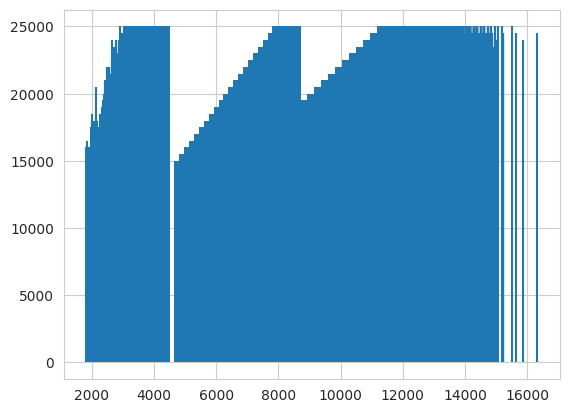

In [16]:
import matplotlib.pyplot as plt
buy_target=np.array(final_df['Buy_Target'])
pprofit=np.array(final_df['per profit'])
profit=np.array(final_df['Profit'])
plt.vlines(profit,ymax=buy_target,ymin=0)

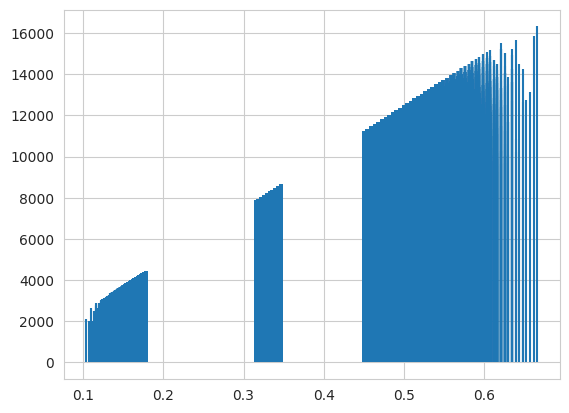

In [17]:
plt.vlines(pprofit,ymax=profit,ymin=0)

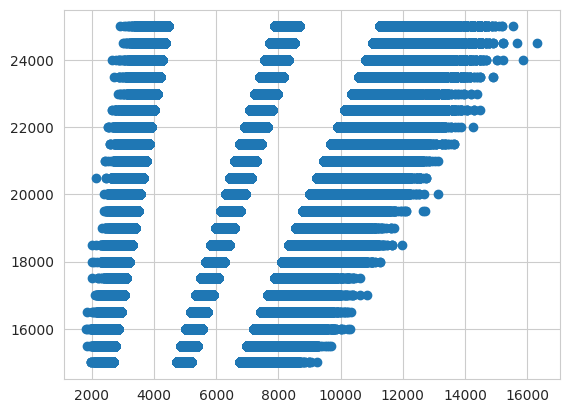

In [18]:
plt.scatter(profit,buy_target)

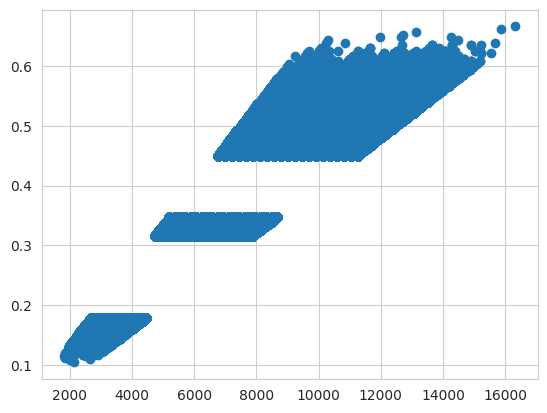

In [19]:
plt.scatter(profit,pprofit)

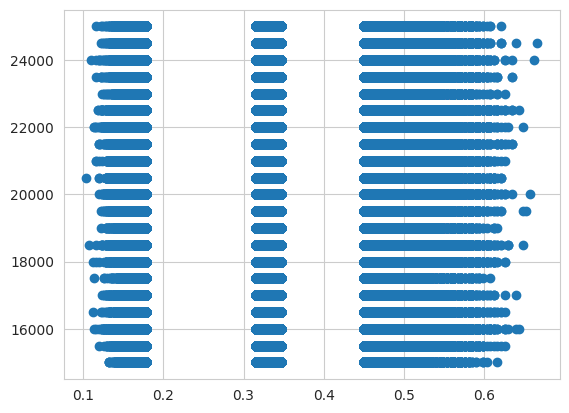

In [20]:
plt.scatter(pprofit,buy_target)

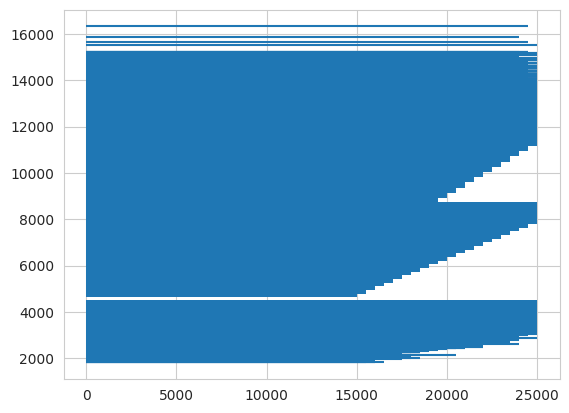

In [21]:
plt.hlines(profit,0,buy_target)


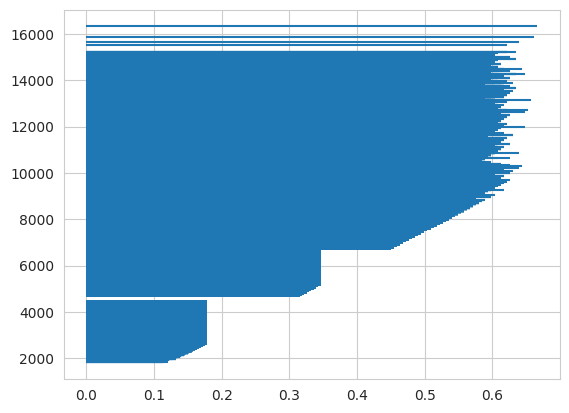

In [22]:
plt.hlines(profit,0,pprofit)

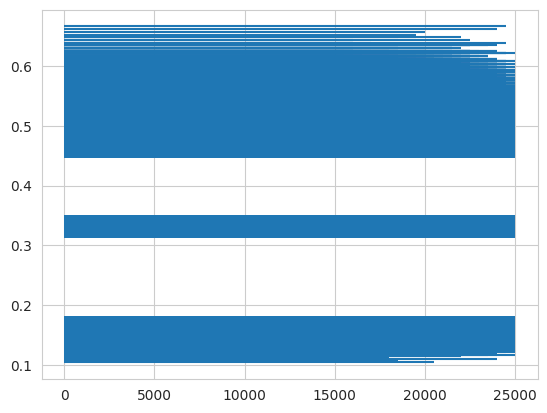

In [23]:
plt.hlines(pprofit,0,buy_target)